In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count, when

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Smart City IoT Data Analysis") \
    .getOrCreate()

# Load traffic data (Simulated IoT data)
# Sample schema: ['sensor_id', 'location', 'timestamp', 'congestion_level', 'vehicle_count']
traffic_data = spark.read.csv("traffic_data.csv", header=True, inferSchema=True)

# Load waste collection data (Simulated IoT data)
# Sample schema: ['sensor_id', 'location', 'timestamp', 'bin_fill_level', 'bin_capacity']
waste_data = spark.read.csv("waste_data.csv", header=True, inferSchema=True)

# Traffic Data Analysis
print("Analyzing Traffic Data...")

# Calculate average congestion level by location
avg_congestion = traffic_data.groupBy("location") \
    .agg(avg("congestion_level").alias("avg_congestion_level")) \
    .orderBy(col("avg_congestion_level").desc())

print("Average Congestion Level by Location:")
avg_congestion.show()

# Waste Data Analysis
print("Analyzing Waste Collection Data...")

# Calculate bin utilization percentage and inefficiencies
waste_data = waste_data.withColumn(
    "utilization_percent",
    (col("bin_fill_level") / col("bin_capacity")) * 100
)

# Identify bins with over 90% fill level
high_fill_bins = waste_data.filter(col("utilization_percent") > 90) \
    .groupBy("location") \
    .agg(count("sensor_id").alias("high_fill_bins_count"))

print("High Fill Bins by Location:")
high_fill_bins.show()

# Combine Insights for Smart City Services
print("Generating Insights for Traffic Management and Waste Collection...")

# Highlight traffic locations needing immediate attention
traffic_issues = avg_congestion.filter(col("avg_congestion_level") > 50)
print("Locations with High Traffic Congestion:")
traffic_issues.show()

# Highlight waste collection inefficiencies
waste_issues = high_fill_bins.filter(col("high_fill_bins_count") > 1)
print("Locations with High Waste Collection Inefficiencies:")
waste_issues.show()
# Save results to a file for smart city authorities
avg_congestion.write.csv("output/avg_congestion.csv", header=True, mode="overwrite")
high_fill_bins.write.csv("output/high_fill_bins.csv", header=True, mode="overwrite")
# Stop SparkSession
spark.stop()

print("Analysis Completed. Results saved in 'output' directory.")












Analyzing Traffic Data...
Average Congestion Level by Location:
+----------------+--------------------+
|        location|avg_congestion_level|
+----------------+--------------------+
|Residential Area|  54.857142857142854|
|         Suburbs|    54.1578947368421|
|          Uptown|  51.666666666666664|
| Industrial Area|   50.96296296296296|
|        Downtown|  50.392857142857146|
+----------------+--------------------+

Analyzing Waste Collection Data...
High Fill Bins by Location:
+----------------+--------------------+
|        location|high_fill_bins_count|
+----------------+--------------------+
|         Suburbs|                   1|
| Industrial Area|                   3|
|Residential Area|                   1|
|          Uptown|                   5|
|        Downtown|                   4|
+----------------+--------------------+

Generating Insights for Traffic Management and Waste Collection...
Locations with High Traffic Congestion:
+----------------+--------------------+
|   

Visualizing Traffic Data...


<ipython-input-14-cfbcabe68304>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg_congestion_level", y="location", data=avg_congestion_pd, palette="viridis")


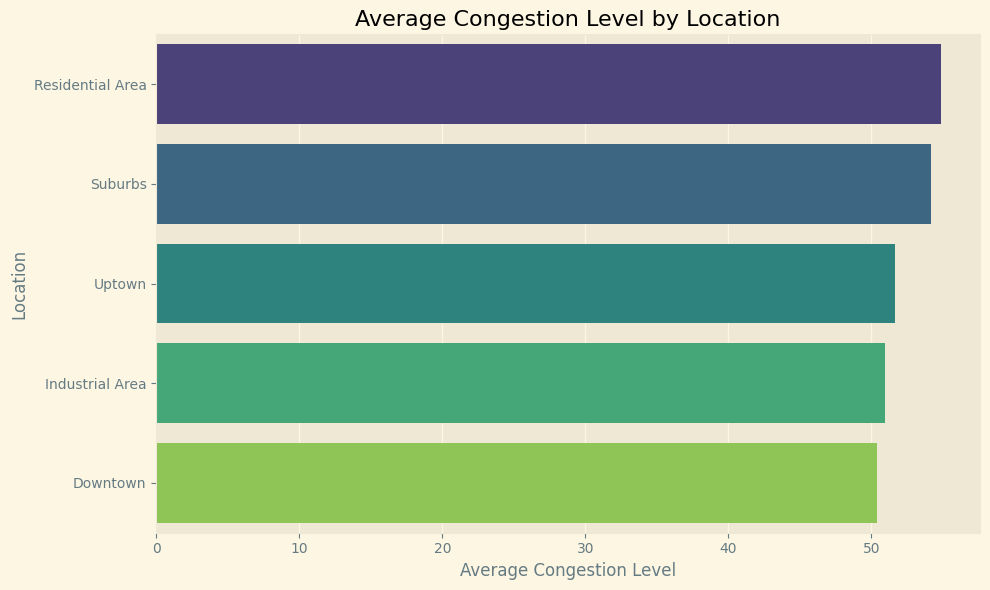

Visualizing Waste Collection Data...


<ipython-input-14-cfbcabe68304>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="high_fill_bins_count", y="location", data=high_fill_bins_pd, palette="magma")


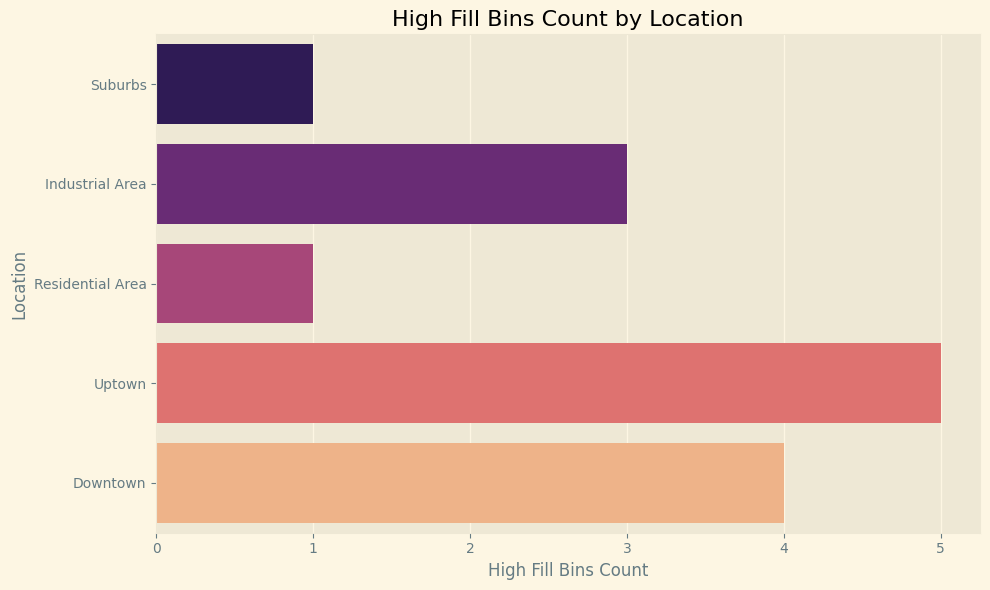

Analysis and visualization completed. Results and plots saved in the 'output' directory.


In [14]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count, when
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Smart City IoT Data Analysis") \
    .getOrCreate()

# Load traffic data (Simulated IoT data)
traffic_data = spark.read.csv("traffic_data.csv", header=True, inferSchema=True)

# Load waste collection data (Simulated IoT data)
waste_data = spark.read.csv("waste_data.csv", header=True, inferSchema=True)

# Traffic Data Analysis
avg_congestion = traffic_data.groupBy("location") \
    .agg(avg("congestion_level").alias("avg_congestion_level")) \
    .orderBy(col("avg_congestion_level").desc())

# Waste Data Analysis
waste_data = waste_data.withColumn(
    "utilization_percent",
    (col("bin_fill_level") / col("bin_capacity")) * 100
)

high_fill_bins = waste_data.filter(col("utilization_percent") > 90) \
    .groupBy("location") \
    .agg(count("sensor_id").alias("high_fill_bins_count"))

# Visualization Setup
plt.style.use('Solarize_Light2')

# Traffic Data Visualization
print("Visualizing Traffic Data...")
avg_congestion_pd = avg_congestion.toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(x="avg_congestion_level", y="location", data=avg_congestion_pd, palette="viridis")
plt.title("Average Congestion Level by Location")
plt.xlabel("Average Congestion Level")
plt.ylabel("Location")
plt.tight_layout()
plt.savefig("output/traffic_congestion_plot.png")
plt.show()

# Waste Collection Visualization
print("Visualizing Waste Collection Data...")
high_fill_bins_pd = high_fill_bins.toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(x="high_fill_bins_count", y="location", data=high_fill_bins_pd, palette="magma")
plt.title("High Fill Bins Count by Location")
plt.xlabel("High Fill Bins Count")
plt.ylabel("Location")
plt.tight_layout()
plt.savefig("output/waste_collection_plot.png")
plt.show()

# Save results to a file for smart city authorities
avg_congestion.write.csv("output/avg_congestion.csv", header=True, mode="overwrite")
high_fill_bins.write.csv("output/high_fill_bins.csv", header=True, mode="overwrite")

# Stop SparkSession
spark.stop()

print("Analysis and visualization completed. Results and plots saved in the 'output' directory.")